# Ebola Model

Importing libraries: [numpy](https://numpy.org/), [scipy](https://www.scipy.org/), [matplotlib](https://matplotlib.org/)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Defining the model's equations:

$\lambda(t) = \frac{1}{N} * (\beta_i * I(t) + \beta_d * D(t))$

$\dot{S(t)} = -\lambda * S(t)$

$\dot{E(t)} = \lambda * S(t) - f * E(t)$

$\dot{I(t)} = f * E(t) - (m + r) * I(t)$

$\dot{R(t)} = r * I(t)$

$\dot{D(t)} = m * I(t) - \mu * D(t)$

$\dot{B(t)} = \mu * D(t)$

With variables:

* $S$: Susceptibles
* $E$: Exposed
* $I$: Infective
* $R$: Recovered
* $D$: Dead
* $B$: Buried
* $N$: Total population
* $\beta$: Contact rate
* $r$: Recovery rate
* $m$: Mortality rate
* $\mu$: Burying rate

In [4]:
def dEbola(y, t, N, betaI, betaH, f, m, r, mu):
    S, E, I, R, D, B = y
    dSdt = -(betaI * I / N + betaH * D/N) * S
    dEdt = (betaI * I / N + betaH * D/N) * S - f * E
    dIdt = f * E - (m + r) * I
    dRdt = r * I
    dDdt = m * I - mu * D
    dBdt = mu * D
    return dSdt, dEdt, dIdt, dRdt, dDdt, dBdt

In [6]:
(N, tmax) = (1000, 365)
(betaI, betaH) = (0.3, 1)
(f, r, m, mu) = (1/6, 1/10, 1/7.5, 1)

In [10]:
(eInit, iInit, rInit, dInit, bInit) = (0, 1, 0, 0, 0)
sInit = N - (eInit + iInit + rInit + dInit + bInit)

In [12]:
t = np.linspace(0, tmax, tmax)
y0 = (sInit, eInit, iInit, rInit, dInit, bInit)
ret = odeint(dEbola, y0, t, args=(N, betaI, betaH, f, m, r, mu))
(S, E, I, R, D, B) = ret.T

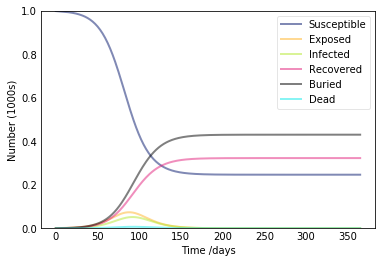

In [17]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, '#02146b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/N, '#ffb428', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/N, '#b4e830', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/N, '#e21e7b', alpha=0.5, lw=2, label='Recovered')
ax.plot(t, B/N, '#000000', alpha=0.5, lw=2, label='Buried')
ax.plot(t, D/N, '#12eaea', alpha=0.5, lw=2, label='Dead')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0, 1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()